In [1]:
%load_ext autoreload
%autoreload 2
import tnetwork as tn
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx

In [2]:
def compute_stats(ps,tts,functions,names):
    sn1 = []
    sn2 = []
    ls = []
    ig=[]
    updates=[]


    scores = []

    for tt in tts:
        print("====",tt," ====")
        ps_tt=ps.aggregate_sliding_window(tt)
        #print(ps_tt.snapshots())
        ps_ig = ps_tt.to_DynGraphIG(sn_duration=tt)
        #print(ps_ig.interactions())
        #((score_sn_m,score_sn_e),score_ls,score_ig,score_udpate) = entropies(ps_tt,ps_ig)
        scores.append([tt]+[f(ps_tt,ps_ig) for f in functions])



    df = pd.DataFrame.from_records(scores,columns=["tts"]+names)
    return df

In [3]:
def score_sn_m(g_sn,g_ig):
    return(g_sn.code_length()[0])
def score_sn_e(g_sn,g_ig):
    return(g_sn.code_length()[1])
def score_ig(g_sn,g_ig):
    return(g_ig.code_length())
def score_update(g_sn,g_ig):
    return(g_sn.code_length_update())
def score_ls(g_sn,g_ig):
    return g_sn.code_length_ls()
def stability(g_sn,g_ig):
    return(g_sn.stability())
def synchronicity(g_sn,g_ig):
    return g_sn.synchronicity()

In [4]:
gggg = tn.DynGraphSN.graph_socioPatterns2012()

AttributeError: type object 'DynGraphSN' has no attribute 'graph_socioPatterns2012'

In [18]:
gggg.snapshots_timesteps()

[1353303380,
 1353303400,
 1353303640,
 1353303760,
 1353303840,
 1353304000,
 1353304020,
 1353304040,
 1353304060,
 1353304080,
 1353304100,
 1353304120,
 1353304140,
 1353304160,
 1353304180,
 1353304200,
 1353304220,
 1353304240,
 1353304260,
 1353304280,
 1353304300,
 1353304320,
 1353304340,
 1353304360,
 1353304380,
 1353304400,
 1353304420,
 1353304440,
 1353304460,
 1353304480,
 1353304500,
 1353304520,
 1353304540,
 1353304560,
 1353304580,
 1353304600,
 1353304620,
 1353304640,
 1353304660,
 1353304680,
 1353304700,
 1353304720,
 1353304740,
 1353304780,
 1353304800,
 1353304820,
 1353304840,
 1353304860,
 1353304880,
 1353304900,
 1353304940,
 1353304960,
 1353305040,
 1353305060,
 1353305080,
 1353305100,
 1353305160,
 1353305220,
 1353305240,
 1353305260,
 1353305280,
 1353305300,
 1353305320,
 1353305340,
 1353305360,
 1353305380,
 1353305420,
 1353305440,
 1353305460,
 1353305480,
 1353305500,
 1353305520,
 1353305540,
 1353305560,
 1353305580,
 1353305600,
 1353305620,

In [19]:
day = 60*60*24
#tts=[day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5)]
#tts=[day*4,day*2,day,int(day/2),int(day/4)]

functions=[score_ls,score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["ls","sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.DynGraphSN.graph_socioPatterns_Primary_School(),tts,functions,names)



==== 345600  ====
ls:  15.83772647454919 0.0 8317 8317
sn_m:  15.83772647454919 0.0 8317 1
sn_e:  15.83772647454919 0.0 8317 1
sn_m:  15.83772647454919 0.0 8317 1
sn_e:  15.83772647454919 0.0 8317 1
ig:  15.83772647454919 1.0 8317 8317
updates:  15.83772647454919 0.0 8317 8317
0 0
synchro 8317.0 8317.0
==== 172800  ====
ls:  15.83772647454919 0.0 8317 8317
sn_m:  15.83772647454919 0.0 8317 1
sn_e:  15.83772647454919 0.0 8317 1
sn_m:  15.83772647454919 0.0 8317 1
sn_e:  15.83772647454919 0.0 8317 1
ig:  15.83772647454919 1.0 8317 8317
updates:  15.83772647454919 0.0 8317 8317
0 0
synchro 8317.0 8317.0
==== 86400  ====
ls:  15.83772647454919 1.0 11454 8317
sn_m:  15.83772647454919 1.0 8317 2
sn_e:  15.83772647454919 1.0 11454 2
sn_m:  15.83772647454919 1.0 8317 2
sn_e:  15.83772647454919 1.0 11454 2
ig:  15.83772647454919 1.584962500721156 8317 8317
updates:  15.83772647454919 1.0 11101 8317
1563 1563
synchro 5727.0 5727.0
==== 43200  ====
ls:  15.83772647454919 1.584962500721156 11777 8

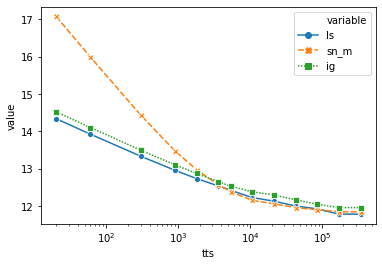

In [23]:
long = pd.melt(df,id_vars=['tts'],value_vars=["ls","sn_m","ig"])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

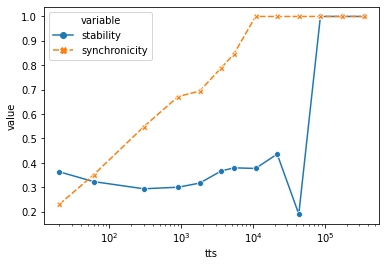

In [21]:
long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

==== 345600  ====
sn_m:  12.45763738099176 1.0 1139 2
sn_e:  12.45763738099176 1.0 1186 2
sn_m:  12.45763738099176 1.0 1139 2
sn_e:  12.45763738099176 1.0 1186 2
ig:  12.45763738099176 1.584962500721156 1139 1139
updates:  12.45763738099176 1.0 2224 1139
26 26
==== 172800  ====
sn_m:  12.45763738099176 1.584962500721156 1139 3
sn_e:  12.45763738099176 1.584962500721156 1489 3
sn_m:  12.45763738099176 1.584962500721156 1139 3
sn_e:  12.45763738099176 1.584962500721156 1489 3
ig:  12.45763738099176 2.0 1139 1145
updates:  12.45763738099176 1.584962500721156 2236 1139
179 190
==== 86400  ====
sn_m:  12.45763738099176 2.321928094887362 1139 5
sn_e:  12.45763738099176 2.321928094887362 1882 5
sn_m:  12.45763738099176 2.321928094887362 1139 5
sn_e:  12.45763738099176 2.321928094887362 1882 5
ig:  12.45763738099176 2.584962500721156 1139 1247
updates:  12.45763738099176 2.321928094887362 2440 1139
378 491
==== 43200  ====
sn_m:  12.45763738099176 3.169925001442312 1139 9
sn_e:  12.45763738099

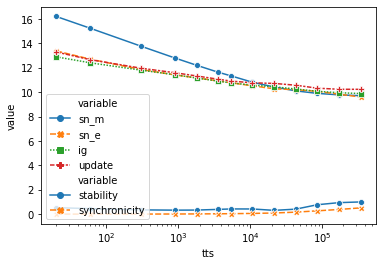

In [201]:
day = 60*60*24
#tts=[day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5)]
#tts=[day*4,day*2,day,int(day/2),int(day/4)]

functions=[score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.DynGraphSN.graph_socioPatterns_Hospital(),tts,functions,names)
long = pd.melt(df,id_vars=['tts'],value_vars=names[:-2])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

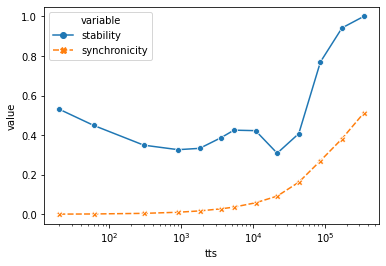

In [202]:
long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [207]:
day = 60*60*24
#tts=[day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5)]
#tts=[day*4,day*2,day,int(day/2),int(day/4)]

functions=[score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.DynGraphSN.graph_socioPatterns2012(),tts,functions,names)
long = pd.melt(df,id_vars=['tts'],value_vars=names[:-2])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

==== 345600  ====
sn_m:  14.98370619265935 1.584962500721156 2220 3
sn_e:  14.98370619265935 1.584962500721156 3152 3
sn_m:  14.98370619265935 1.584962500721156 2220 3
sn_e:  14.98370619265935 1.584962500721156 3152 3
ig:  14.98370619265935 2.0 2220 2314
updates:  14.98370619265935 1.584962500721156 4145 2220
455 541
==== 172800  ====
sn_m:  14.98370619265935 2.321928094887362 2220 5
sn_e:  14.98370619265935 2.321928094887362 3793 5
sn_m:  14.98370619265935 2.321928094887362 2220 5
sn_e:  14.98370619265935 2.321928094887362 3793 5
ig:  14.98370619265935 2.584962500721156 2220 2687
updates:  14.98370619265935 2.321928094887362 4891 2220
580 1044
==== 86400  ====
sn_m:  14.98370619265935 3.0 2220 8
sn_e:  14.98370619265935 3.0 4180 8
sn_m:  14.98370619265935 3.0 2220 8
sn_e:  14.98370619265935 3.0 4180 8
ig:  14.98370619265935 3.321928094887362 2220 3223
updates:  14.98370619265935 3.0 5963 2220
554 1396
==== 43200  ====
sn_m:  14.98370619265935 3.700439718141092 2220 13
sn_e:  14.983706

KeyboardInterrupt: 

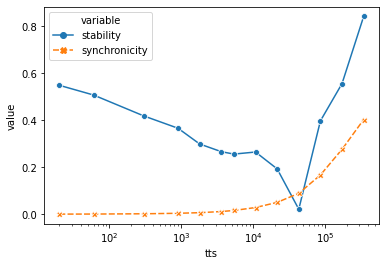

In [206]:

long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [24]:
gg= tn.DynGraphSN.graph_socioPatterns2012().aggregate_sliding_window(day)

In [30]:
g1 = gg.snapshots().values()[0]
g2= gg.snapshots().values()[1]

In [35]:
print(len(g1.edges()))
print(len(g2.edges()))
len(set(g1.edges()).intersection(g2.edges()))

766
668


128

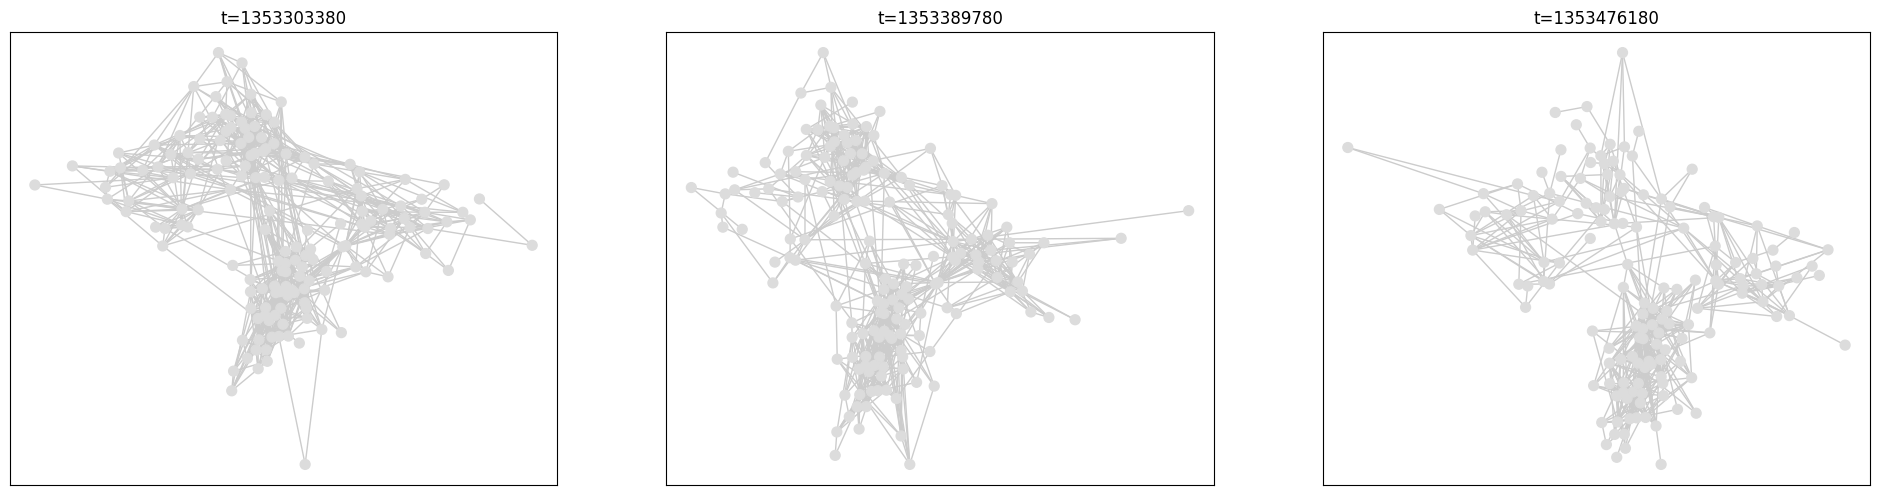

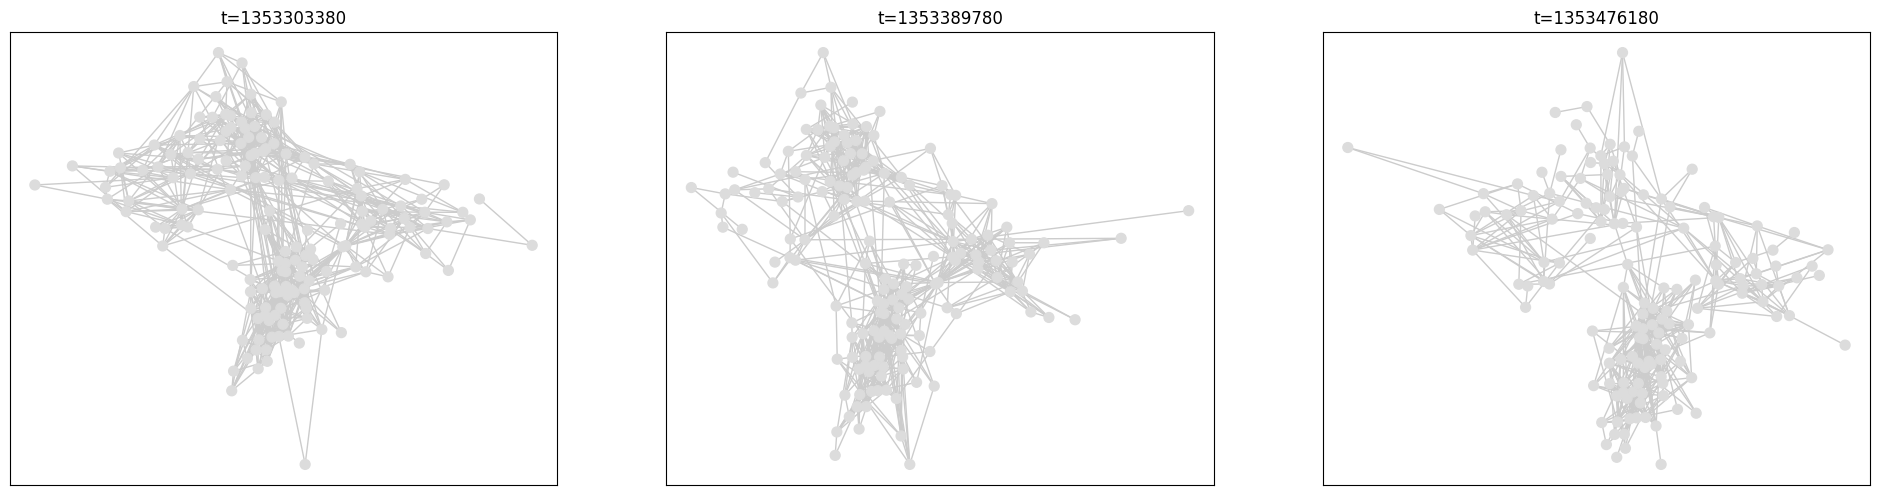

In [39]:
tn.plot_as_graph(gg,ts=[gg.snapshots_timesteps()[0],gg.snapshots_timesteps()[1],gg.snapshots_timesteps()[2]])

In [37]:
gg.snapshots_timesteps()

[1353303380,
 1353389780,
 1353476180,
 1353562580,
 1353648980,
 1353735380,
 1353821780,
 1353908180,
 1353994580]

In [161]:
#def generate_network_temporal_properties(fraction_remove,fraction_nodes,fraction_time,nb_nodes=10,nb_steps=10):
fraction_remove=0.2
fraction_edges=0.5
fraction_time=0.1
nb_nodes=10
nb_edges=20
nb_steps=10

In [162]:
import copy
base_graph = nx.gnm_random_graph(nb_nodes,nb_edges)
net = tn.DynGraphSN([copy.deepcopy(base_graph) for i in range(nb_steps)])



In [164]:
print(net.stability())
print(net.synchronicity())

180 180
1.0
1.0


In [165]:
delete = np.random.choice(net.snapshots_timesteps(),int(fraction_remove*len(net.snapshots_timesteps())),replace=False)

In [166]:
print(delete)

[1 4]


In [167]:
for t in delete:
    edges = net.snapshots(t).edges()
    print("--",edges)
    nb_to_remove = max(0,int(fraction_edges*len(edges)))
    to_remove = np.random.choice(range(len(edges)),nb_to_remove,replace=False)
    to_remove = [e for i,e in enumerate(edges) if i not in to_remove]
    print(to_remove)
    
    next_steps = range(t,t+int(fraction_time*len(net.snapshots())))
    next_steps = [t%len(net.snapshots()) for t in next_steps]
    print(next_steps)
    net.remove_interactions_from(to_remove,next_steps)

-- [(0, 3), (0, 5), (0, 8), (0, 1), (1, 8), (1, 9), (1, 2), (1, 4), (2, 4), (2, 3), (2, 5), (3, 8), (3, 5), (4, 8), (4, 6), (5, 8), (5, 6), (5, 7), (6, 9), (6, 7)]
[(0, 3), (0, 8), (0, 1), (2, 4), (2, 5), (3, 8), (4, 6), (5, 8), (5, 7), (6, 9)]
[1]
------- 1
-- [(0, 3), (0, 5), (0, 8), (0, 1), (1, 8), (1, 9), (1, 2), (1, 4), (2, 4), (2, 3), (2, 5), (3, 8), (3, 5), (4, 8), (4, 6), (5, 8), (5, 6), (5, 7), (6, 9), (6, 7)]
[(0, 3), (0, 5), (0, 8), (0, 1), (1, 8), (2, 4), (2, 5), (3, 5), (5, 8), (5, 6)]
[4]
------- 4


In [168]:
print(net.stability())
print(net.synchronicity())

140 160
0.875
0.9


In [4]:
day = 60*60*24
#tts=[day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5),60,20]
#tts=[day*4,day*2,day,int(day/2),int(day/4),int(day/8),int(day/16),int(60*60),int(60*30),int(60*15),int(60*5)]
tts=[day*365,day*30,day*7,day,int(day/24)]

functions=[score_ls,score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["ls","sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.read_link_stream("/Users/remycazabet/Downloads/ia-enron-employees/ia-enron-employees.edges",sep=" ")

,tts,functions,names)




==== 31536000  ====
ls:  14.476809478650157 2.0 341 151
sn_m:  14.476809478650157 2.0 151 4
sn_e:  14.476809478650157 2.0 341 4
sn_m:  14.476809478650157 2.0 151 4
sn_e:  14.476809478650157 2.0 341 4
ig:  14.476809478650157 2.321928094887362 151 152
updates:  14.476809478650157 2.0 297 151
184 186
synchro 85.25 85.25
==== 2592000  ====
ls:  14.476809478650157 5.247927513443585 2413 151
sn_m:  14.476809478650157 5.247927513443585 151 38
sn_e:  14.476809478650157 5.247927513443585 2413 38
sn_m:  14.476809478650157 5.247927513443585 151 38
sn_e:  14.476809478650157 5.247927513443585 2413 38
ig:  14.476809478650157 5.285402218862249 151 406
updates:  14.476809478650157 5.247927513443585 805 151
1939 2235
synchro 63.5 67.02777777777777
==== 604800  ====
ls:  14.476809478650157 7.348728154231077 6545 151
sn_m:  14.476809478650157 7.348728154231077 151 163
sn_e:  14.476809478650157 7.348728154231077 6545 163
sn_m:  14.476809478650157 7.348728154231077 151 163
sn_e:  14.476809478650157 7.34872

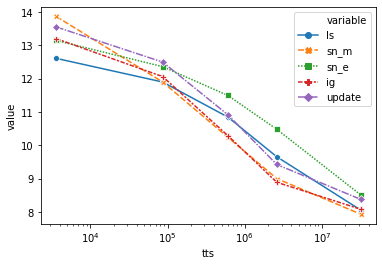

In [5]:
long = pd.melt(df,id_vars=['tts'],value_vars=names[:-2])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

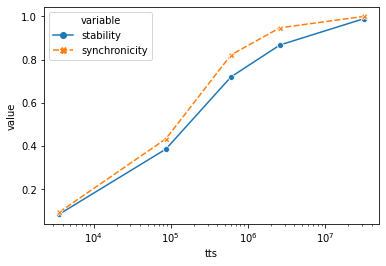

In [6]:
long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [8]:

tts=[1000,500,100,50,25,10,5,1]

functions=[score_ls,score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["ls","sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.generate_toy_random_network()[0],tts,functions,names)





100% (26 of 26) |########################| Elapsed Time: 0:00:00 ETA:  00:00:00

==== 1000  ====
ls:  11.765286098723683 0.0 327 327
sn_m:  11.765286098723683 0.0 327 1
sn_e:  11.765286098723683 0.0 327 1
sn_m:  11.765286098723683 0.0 327 1
sn_e:  11.765286098723683 0.0 327 1
ig:  11.765286098723683 1.0 327 327
updates:  11.765286098723683 0.0 327 327
0 0
synchro 327.0 327.0
==== 500  ====
ls:  11.765286098723683 0.0 327 327
sn_m:  11.765286098723683 0.0 327 1
sn_e:  11.765286098723683 0.0 327 1
sn_m:  11.765286098723683 0.0 327 1
sn_e:  11.765286098723683 0.0 327 1
ig:  11.765286098723683 1.0 327 327
updates:  11.765286098723683 0.0 327 327
0 0
synchro 327.0 327.0
==== 100  ====
ls:  11.765286098723683 1.584962500721156 726 327
sn_m:  11.765286098723683 1.584962500721156 327 3
sn_e:  11.765286098723683 1.584962500721156 726 3
sn_m:  11.765286098723683 1.584962500721156 327 3
sn_e:  11.765286098723683 1.584962500721156 726 3
ig:  11.765286098723683 2.0 327 327
updates:  11.765286098723683 1.584962500721156 424 327
379 389
synchro 242.0 242.0
==== 50  ====
ls:  11.7

In [1]:
long = pd.melt(df,id_vars=['tts'],value_vars=names[:-2])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')
plt.axvline(60)
plt.text(60.1,0,'m',rotation=90)

NameError: name 'pd' is not defined

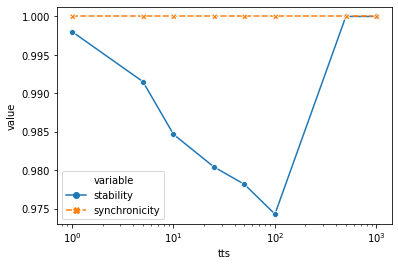

In [10]:
long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [7]:

tts=[10,5,2,1]

functions=[score_ls,score_sn_m,score_sn_e,score_ig,score_update,stability,synchronicity]
names= ["ls","sn_m","sn_e","ig","update","stability","synchronicity"]


#tts = [int(day)]

df = compute_stats(tn.read_link_stream("/Users/remycazabet/Downloads/imdb/imdb.edges",sep=",",columns=["n1","n2","?","time"]),tts,functions,names)









==== 10  ====
ls:  34.399670535108505 1.584962500721156 295729 295729
sn_m:  34.399670535108505 1.584962500721156 295729 3
sn_e:  34.399670535108505 1.584962500721156 295729 3
sn_m:  34.399670535108505 1.584962500721156 295729 3
sn_e:  34.399670535108505 1.584962500721156 295729 3
ig:  34.399670535108505 2.0 295729 295729
updates:  34.399670535108505 1.584962500721156 468736 295729
0 0
synchro 98576.33333333333 295729.0
==== 5  ====


KeyboardInterrupt: 

In [ ]:
long = pd.melt(df,id_vars=['tts'],value_vars=names[:-2])
long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [ ]:
long = pd.melt(df,value_vars=["stability","synchronicity"],id_vars=['tts'])
#long["value"]=np.log(long["value"])
ax = sns.lineplot(x="tts",y="value",data=long,hue="variable",markers=True,style="variable")
ax.set_xscale('log')

In [ ]:
def